In [2]:
# First, import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Filter the dataset to keep only rows with 'Genre' as 'Male' or 'Female'
# First, let's check the unique values in the 'Genre' column to see what we're working with
df = pd.read_excel('/content/data-sell4all.xlsx')

# Filter for 'Male' and 'Female'
filtered_gender_df = df[df['Genre'].isin(['Male', 'Female'])]

# Save the filtered data to a new Excel file
output_gender_file_path = '/content/filtered.xlsx'
filtered_gender_df.to_excel(output_gender_file_path, index=False)

In [5]:
# Read the CSV file (assuming 'dataset-sell4all.csv' is the file)
df = pd.read_excel('/content/filtered.xlsx')

# Display the first 5 rows of the data
print("First 5 rows of the data:")
print(df.head())

# Technical summary of the dataset
print("\nTechnical summary of the data:")
print(df.info())

# Explanation of the technical summary in Markdown cell (if using Jupyter Notebook)
"""
## Technical Summary Explanation
- The dataset contains X rows and Y columns.
- Non-null entries refer to the values that are not missing or empty.
- The columns 'Pays', 'Âge', 'Genre', and 'Dépenses des clients' are present in the dataset, with respective data types.
"""

First 5 rows of the data:
      Pays   Age    Genre  Dépenses des clients
0   France   32.0  Female                150.50
1  Germany   45.0    Male                200.75
2    Spain   28.0  Female                 75.25
3    Italy   39.0    Male                180.00
4       UK   52.0  Female                250.30

Technical summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pays                  54 non-null     object 
 1    Age                  53 non-null     float64
 2   Genre                 54 non-null     object 
 3   Dépenses des clients  53 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.8+ KB
None


"\n## Technical Summary Explanation\n- The dataset contains X rows and Y columns.\n- Non-null entries refer to the values that are not missing or empty.\n- The columns 'Pays', 'Âge', 'Genre', and 'Dépenses des clients' are present in the dataset, with respective data types.\n"

In [6]:
# Clean the " Age " and "Dépenses des clients" columns by converting to numeric and handling errors
df[' Age '] = pd.to_numeric(df[' Age '], errors='coerce')  # Convert ' Age ' to numeric, set errors to NaN
df['Dépenses des clients'] = pd.to_numeric(df['Dépenses des clients'], errors='coerce')  # Convert 'Dépenses des clients' to numeric, set errors to NaN

# Drop rows with NaN values in the " Age " or "Dépenses des clients" columns
df_cleaned = df.dropna(subset=[' Age ', 'Dépenses des clients'])

# Calculate the median and mean of " Age " and "Dépenses des clients"
age_median = df_cleaned[' Age '].median()
age_mean = df_cleaned[' Age '].mean()
spending_median = df_cleaned['Dépenses des clients'].median()
spending_mean = df_cleaned['Dépenses des clients'].mean()

print(f"\nMedian of  Age: { age_median}")
print(f"Mean of  Age: { age_mean}")
print(f"Median of Client Spending: {spending_median}")
print(f"Mean of Client Spending: {spending_mean}")


Median of  Age: 36.0
Mean of  Age: 37.40384615384615
Median of Client Spending: 162.625
Mean of Client Spending: 156.49615384615385


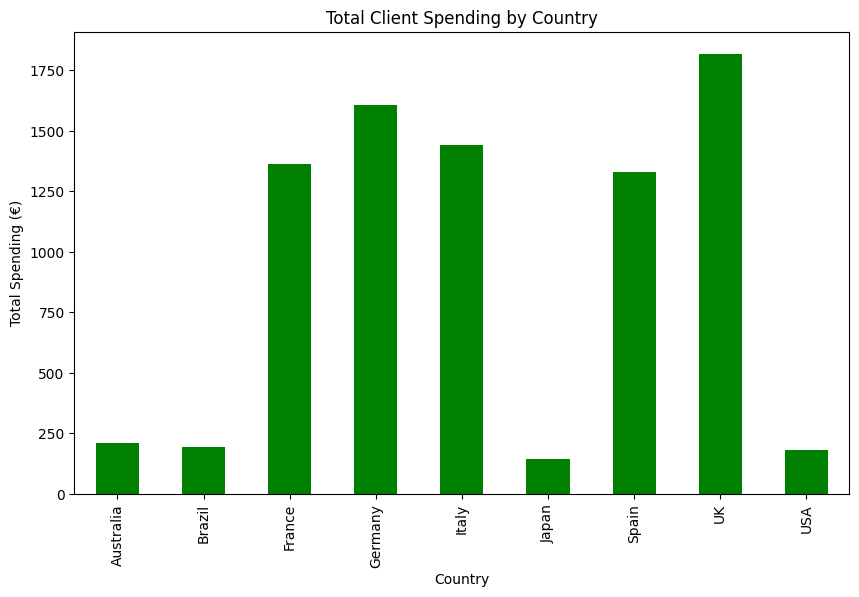


Data cleaned and saved to 'cleaned_dataset-sell4all.csv'


In [8]:
# Remove rows where 'Pays' has missing or invalid values (like empty strings)
df = df[df['Pays'].notna() & (df['Pays'] != '')]

# Clean data by removing rows with client spending < 10€
df_cleaned = df[df['Dépenses des clients'] >= 10]

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Now, let's plot the total client spending by country
country_spending = df_cleaned.groupby('Pays')['Dépenses des clients'].sum()

plt.figure(figsize=(10, 6))
country_spending.plot(kind='bar', color='green')
plt.title('Total Client Spending by Country')
plt.xlabel('Country')
plt.ylabel('Total Spending (€)')
plt.show()

# Save the cleaned data to a new CSV file, keeping only specified columns
df_cleaned[['Pays', ' Age ', 'Genre', 'Dépenses des clients']].to_csv('cleaned_dataset-sell4all.csv', index=False)

print("\nData cleaned and saved to 'cleaned_dataset-sell4all.csv'")